In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('/Users/maria/Desktop/M4135/adv_ML/chips.csv')
data['class'] = data['class'].replace({'N': -1, 'P': 1})
x = pd.DataFrame(data.drop(['class'], axis=1))
y = pd.DataFrame(data['class'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [33]:
C = list(range(1,10))
break_ties = [True, False]
gamma = ['scale', 'auto']
degree = list(range(1,10))

In [34]:
sv = svm.SVC(kernel='rbf')
sv.fit(x_train, y_train.values.ravel())
y_pred = sv.predict(x_train)
print(classification_report(y_train, y_pred, zero_division = 0))

              precision    recall  f1-score   support

          -1       0.77      0.95      0.85        42
           1       0.93      0.68      0.78        37

    accuracy                           0.82        79
   macro avg       0.85      0.81      0.82        79
weighted avg       0.84      0.82      0.82        79



In [35]:
cvm_rbf1 = 0.82

In [7]:
hyperparameters = dict(C=C, break_ties=break_ties, gamma=gamma, degree=degree)
clf = GridSearchCV(sv, hyperparameters, cv=10)
best_model = clf.fit(x_test,y_test.values.ravel())

In [8]:
sv = svm.SVC(kernel='rbf', C=best_model.best_estimator_.get_params()['C'],
             break_ties = best_model.best_estimator_.get_params()['break_ties'],
            gamma = best_model.best_estimator_.get_params()['gamma'])
sv.fit(x_test, y_test.values.ravel())
y_pred = sv.predict(x_test)
print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

          -1       0.88      0.83      0.86        18
           1       0.86      0.90      0.88        21

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



In [9]:
cvm_rbf2 = 0.87

In [37]:
sv = svm.SVC(kernel='rbf')
sv.fit(x_train, y_train.values.ravel())

SVC()

/Users/maria/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


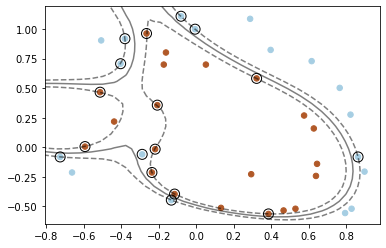

In [52]:
clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(x_test, y_test)

plt.scatter(x_test['x'], x_test['y'], c=y_test.values.ravel(), s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()